<a href="https://colab.research.google.com/github/DominikAlb/GryLiczbowe-python/blob/master/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

import calendar
import string
import time
from typing import List
from datetime import datetime, timedelta
import statistics as stat
import logging
import os
import random
import matplotlib.pyplot as plt


class Game:

    def __init__(self, name: string, debug: bool, min_val: int, max_val: int, randomInput: bool, *args):
        self.name: string = name
        self.debug = debug
        self.min_val = min_val
        self.max_val = max_val
        self.randomInput = randomInput
        self.games = []
        self.gameResults = []
        if len(args) == 1 and isinstance(args[0], int):
            self.n = args[0]
        elif len(args) == 2 and isinstance(args[0], int) and isinstance(args[1], int):
            self.n = args[0]
            self.m = args[1]
        elif len(args) == 4 and isinstance(args[0], int) and isinstance(args[1], int) and isinstance(args[2],
                                                                                                     int) and isinstance(
            args[3], int):
            self.n = args[0]
            self.min_val2 = args[1]
            self.max_val2 = args[2]
            self.m = args[3]

    def monteCarlo(self, numSpins: int) -> float:
        pass

    def lasVegas(self, numSpins: int):
        pass

    def statistics(self, arr: List[float]):
        mean = stat.mean(arr)
        var = stat.variance(arr)
        sd = stat.stdev(arr)

        print("Rezultat:\n")
        print("srednia, " + str(mean) + "\n")
        print("wariancja, " + str(var) + "\n")
        print("odchylenie standardowe, " + str(sd) + "\n")
        print("---------------------------------------------------------------\n")

        if self.debug:
            logging.info("Wariancja: " + str(var))
            logging.info("Odchylenie standardowe: " + str(sd))
            logging.info("srednia: " + str(mean))
            logging.info("Oczekiwany rezultat dla " + self.name + " to: " + str(round(100 * mean, 3)) + " % +/- " + str(
                round(100 * 1.96 * sd, 3)) + " % z 95% pewnoscia\n\n")

        return mean, var, sd

    def draft(self, min, max):
        #pass
        plt.ylabel("prawdopodobienstwo wygranej")
        plt.xlabel("liczba zakladow: " + self.name)
        plt.plot(self.games[min:max], self.gameResults[min:max])
        #if "LasVegas" in self.name:
        #    self.timeToWin()

    def show(self):
        #pass
        plt.show()

    @staticmethod
    def draw(min_val: int, max_val: int, numbers: List[int], numSpins: int) -> bool:
        outcome = random.sample(range(min_val, max_val), numSpins)
        # print("OUT: " + str(outcome) + " : " + str(numSpins))
        count: int = 0
        for x in outcome:
            if x in numbers:
                count = count + 1
        if count == numSpins:
            return True
        return False

    def saveLocally(self, text: string, folder: string) -> bool:
        if folder == '':
            folder = self.name
        try:
            directory = os.path.join("D:\\", "awss3\\", folder)
            with open(directory + "\\" + self.name + "-" + datetime.now().strftime("%H-%M-%S") + str(
                    self.randomInput) + ".csv",
                      'a+', encoding='UTF8') as f:
                f.write(text)
                f.close()

        except Exception as e:
            print(e)
            return False
        return True

    def loadLocally(self, folder: str) -> bool:
        try:
            fixdata = []
            directory = os.path.join("D:\\", "awss3\\", folder)
            for root, dirs, files in os.walk(directory):
                for file in files:
                    gameResults: string = ""
                    results = []
                    if file.endswith(".csv"):
                        f = open(os.path.join(directory + "\\" + file), 'r')
                        gameResults = f.read().split('\n')[0]
                        for s in gameResults.split(' '):
                            try:
                                results.append(float(s))
                            except Exception as e:
                                continue

                        self.gameResults = results
                        self.games = range(1, len(self.gameResults) + 1)
                        self.draft(0, len(self.gameResults))
                        f.close()
                    fixdata += results
                    del gameResults
                    del results
            mean, var, sd = self.statistics(fixdata)
            text: string = "\nsrednia: " + str(mean) + "\nwariancja: " + str(
                var) + "\nodchylenie standardowe: " + str(sd)
            #print(text)
            del fixdata
        except Exception as e:
            print(e)
            return False
        return True

    def timeToWin(self):

        drawPerWeek: int = 0
        drawPerDay: int = 0
        drawPerMinute: int = 0
        endDate = None

        if "EuroRoulette" in self.name:
            drawPerMinute = 2
        elif "Lotto" in self.name:
            drawPerDay = 1
            drawPerWeek = 2
        elif "MultiMulti" in self.name:
            drawPerDay = 2
            drawPerWeek = 7
        elif "EuroJackpot" in self.name:
            drawPerDay = 1
            drawPerWeek = 2
        elif "PowerBall" in self.name:
            drawPerDay = 1
            drawPerWeek = 2

        if drawPerMinute != 0:
            tempValue = self.gameResults[-1] * drawPerMinute
            endDate = timedelta(days=tempValue / 1440)
            _time = endDate.seconds / 1440
            return _time
        elif drawPerDay != 0 and drawPerWeek != 0:
            avgDrawPerDay = ((drawPerDay * drawPerWeek) / 7)
            if self.gameResults[-1] * 7 > timedelta.max.days:
                tempValue = self.gameResults[1] * avgDrawPerDay
            else:
                tempValue = self.gameResults[-1] / (drawPerDay * drawPerWeek) * avgDrawPerDay
            return tempValue
        return -1

In [8]:
import random
import string
import logging
import statistics as stat
import time

class EuroRoulette(Game):
    def __init__(self, name: string, debug: bool, min_val: int, max_val: int, randomInput: bool, *args):
        super().__init__(name, debug, min_val, max_val, randomInput, *args)

    def monteCarlo(self, numSpins: int) -> float:
        wins: int = 0
        numbers = []
        if not self.randomInput:
            numbers = random.sample(range(self.min_val, self.max_val), self.n)
        for i in range(0, numSpins):
            if self.randomInput:
                numbers = random.sample(range(self.min_val, self.max_val), self.n)
            if super().draw(self.min_val, self.max_val, numbers, self.n):
                wins = wins + 1
            self.games.append(i + 1)
            self.gameResults.append(wins / (i + 1))
        super().draft(len(self.gameResults)-numSpins, len(self.gameResults))
        if self.debug:
            logging.info(
                "Oczekiwany wynik wylosowania w " + self.name + ": " + str(numbers) + " , to: " + str(100 * wins / numSpins) + "%\n")
            logging.info(
                "liczba wygranych: " + str(wins) + "\n\n")
        return wins/numSpins

    def lasVegas(self, numSpins: int):
        count: int = 0
        numbers = []
        start_time = time.time()
        #self.gameResults, self.games, count = self.loadTempDataIfExists()
        self.gameResults, self.games, count = [], [], 0
        if not self.randomInput:
            numbers = random.sample(range(self.min_val, self.max_val), self.n)
        for i in range(len(self.games), numSpins - len(self.games)):
            while True:
                if (time.time() - start_time) > 6000:
                    self.save(str(count) + " " + str(" ".join([str(g) for g in self.gameResults])), self.name, True)
                    exit(0)
                if self.randomInput:
                    numbers = random.sample(range(self.min_val, self.max_val), self.n)
                count += 1
                if super().draw(self.min_val, self.max_val, numbers, len(numbers)):
                    break
            self.games.append(i + 1)
            self.gameResults.append(count)
        super().draft(len(self.gameResults)-numSpins, len(self.gameResults))
        if self.debug:
            logging.info(
                "Oczekiwany sredni czas wygranej w " + self.name + ": " + str(numbers) + " , to: " + str(stat.mean(self.gameResults)) + "%\n")
        #self.deleteTempFile()
        return self.gameResults, self.timeToWin()

In [9]:
import string

class Lotto(EuroRoulette):
    def __init__(self, name: string, debug: bool, min_val: int, max_val: int, randomInput: bool, *args):
        super().__init__(name, debug, min_val, max_val, randomInput, *args)

    def monteCarlo(self, numSpins: int) -> float:
        return super().monteCarlo(numSpins)

    def lasVegas(self, numSpins: int):
        return super().lasVegas(numSpins)

In [10]:
import random
import string
import logging
import statistics as stat
import time

class MultiMulti(Game):
    def __init__(self, name: string, debug: bool, min_val: int, max_val: int, *args):
        super().__init__(name, debug, min_val, max_val, *args)

    def monteCarlo(self, numSpins: int) -> float:
        wins: int = 0
        numbers = []
        if not self.randomInput:
            numbers = random.sample(range(self.min_val, self.max_val), self.n)
        for i in range(0, numSpins):
            if self.randomInput:
                numbers = random.sample(range(self.min_val, self.max_val), self.n)
            if super().draw(self.min_val, self.max_val, numbers, self.m):
                wins = wins + 1
            self.games.append(i + 1)
            self.gameResults.append(wins / (i + 1))
        super().draft(len(self.gameResults)-numSpins, len(self.gameResults))
        if self.debug:
            logging.info(
                "Oczekiwany wynik wylosowania w " + self.name + ": " + str(numbers) + " , to: " + str(100 * wins / numSpins) + "%\n")
            logging.info(
                "liczba wygranych: " + str(wins) + "\n\n")
        return wins / numSpins

    def lasVegas(self, numSpins: int):
        count: int = 0
        numbers = []
        start_time = time.time()
        self.gameResults, self.games, count = self.loadTempDataIfExists()
        if not self.randomInput:
            numbers = random.sample(range(self.min_val, self.max_val), self.n)
        for i in range(0, numSpins - len(self.games)):
            while True:
                if (time.time() - start_time) > 6000:
                    self.save(str(i) + " " + str(" ".join([str(g) for g in self.gameResults])), self.name, True)
                    exit(0)
                if self.randomInput:
                    numbers = random.sample(range(self.min_val, self.max_val), self.n)
                count += 1
                if super().draw(self.min_val, self.max_val, numbers, self.m):
                    break
            self.games.append(i + 1)
            self.gameResults.append(count)
        super().draft(len(self.gameResults)-numSpins, len(self.gameResults))
        if self.debug:
            logging.info(
                "Oczekiwany sredni czas wygranej w " + self.name + ": " + str(numbers) + " , to: " + str(
                    stat.mean(self.gameResults)) + "%\n")

        self.deleteTempFile()
        return self.gameResults

In [11]:
import random
import string
import logging
import statistics as stat
import time

class EuroJackpot(Game):
    def __init__(self, name: string, debug: bool, min_val: int, max_val: int, randomInput: bool, *args):
        super().__init__(name, debug, min_val, max_val, randomInput, *args)

    def monteCarlo(self, numSpins: int) -> float:
        wins: int = 0
        numbers1 = []
        numbers2 = []
        if not self.randomInput:
            numbers1 = random.sample(range(self.min_val, self.max_val), self.n)
            numbers2 = random.sample(range(self.min_val2, self.max_val2), self.m)
        for i in range(0, numSpins):
            if self.randomInput:
                numbers1 = random.sample(range(self.min_val, self.max_val), self.n)
                numbers2 = random.sample(range(self.min_val2, self.max_val2), self.m)
            if super().draw(self.min_val, self.max_val, numbers1, len(numbers1)) and \
               super().draw(self.min_val2, self.max_val2, numbers2, len(numbers2)):
                wins = wins + 1
            self.games.append(i + 1)
            self.gameResults.append(wins / (i + 1))
        super().draft(len(self.gameResults)-numSpins, len(self.gameResults))
        if self.debug:
            logging.info(
                "Oczekiwany wynik wylosowania w " + self.name + ": " + str(numbers1) + " - " + str(numbers2) + " , to: " + str(
                    100 * wins / numSpins) + "%\n")
            logging.info(
                "liczba wygranych: " + str(wins) + "\n\n")

        return wins/numSpins

    def lasVegas(self, numSpins: int) -> []:
        count: int = 0
        numbers1 = []
        numbers2 = []
        start_time = time.time()
        self.gameResults, self.games, count = self.loadTempDataIfExists()
        if not self.randomInput:
            numbers1 = random.sample(range(self.min_val, self.max_val), self.n)
            numbers2 = random.sample(range(self.min_val2, self.max_val2), self.m)
        for i in range(0, numSpins - len(self.games)):
            while True:
                if (time.time() - start_time) > 6000:
                    s = ""
                    if len(self.gameResults) == 0:
                        s = "0"
                    else:
                        s = str(" ".join([str(g) for g in self.gameResults]))
                    self.save(str(count) + " " + s, self.name, True)
                    exit(0)
                if self.randomInput:
                    numbers1 = random.sample(range(self.min_val, self.max_val), self.n)
                    numbers2 = random.sample(range(self.min_val2, self.max_val2), self.m)
                count += 1
                if super().draw(self.min_val, self.max_val, numbers1, len(numbers1)) and \
                        super().draw(self.min_val2, self.max_val2, numbers2, len(numbers2)):
                    print("BREAK!")
                    break
            self.games.append(i)
            self.gameResults.append(count + 1)
        super().draft(len(self.gameResults)-numSpins, len(self.gameResults))
        if self.debug:
            logging.info(
                "Oczekiwany sredni czas wygranej w " + self.name + ": " + str(numbers1) + ", " + str(numbers2) +
                " , to: " + str(stat.mean(self.gameResults)) + "%\n")

        self.deleteTempFile()
        return self.gameResults

In [12]:
import string

class PowerBall(EuroJackpot):
    def __init__(self, name: string, debug: bool, min_val: int, max_val: int, randomInput: bool, *args):
        super().__init__(name, debug, min_val, max_val, randomInput, *args)

    def monteCarlo(self, numSpins: int) -> float:
        return super().monteCarlo(numSpins)

    def lasVegas(self, numSpins: int):
        return super().lasVegas(numSpins)

In [ ]:
# This is a sample Python script.

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

# Press the green button in the gutter to run the script.
from datetime import datetime
import logging
import time
import string
import statistics as stat


def play(length: int, numberOfGames: int, game: Game, gameName: string):
    arr = []
    print(game.name)
    if gameName == "MonteCarlo":
        print("Monte Carlo")
        start_time = time.time()
        arr = [game.monteCarlo(numberOfGames) for _ in range(0, length)]
        print("--- %s minutes ---" % ((time.time() - start_time) / 60))
        game.show()
        mean, var, sd = game.statistics(arr)
    elif gameName == "LasVegas":
        print("Las Vegas")
        start_time = time.time()
        _tuple = [game.lasVegas(numberOfGames) for _ in range(0, length)]
        unzip = list(zip(*_tuple))
        arr, timeToWin = unzip[0], unzip[1]
        print("--- %s minutes ---" % ((time.time() - start_time)/60))
        game.show()
        temp = []
        for i in arr:
            temp += i

        mean, var, sd = game.statistics(temp)

EuroRoulette-MonteCarlo
Monte Carlo
--- 0.13936694860458373 minutes ---


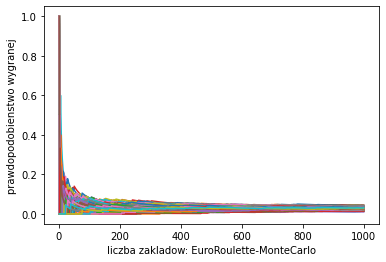

Rezultat:

srednia, 0.026948

wariancja, 2.62034994994995e-05

odchylenie standardowe, 0.005118935387314388

---------------------------------------------------------------

[0.03, 0.028, 0.025, 0.036, 0.019, 0.031, 0.023, 0.033, 0.028, 0.022, 0.033, 0.022, 0.029, 0.029, 0.035, 0.029, 0.022, 0.028, 0.025, 0.028, 0.022, 0.02, 0.027, 0.029, 0.035, 0.026, 0.029, 0.03, 0.025, 0.026, 0.031, 0.036, 0.024, 0.035, 0.03, 0.023, 0.025, 0.019, 0.026, 0.035, 0.027, 0.028, 0.027, 0.026, 0.03, 0.022, 0.032, 0.028, 0.027, 0.027, 0.024, 0.022, 0.033, 0.017, 0.027, 0.024, 0.018, 0.027, 0.028, 0.027, 0.035, 0.033, 0.016, 0.031, 0.012, 0.032, 0.03, 0.025, 0.025, 0.027, 0.02, 0.028, 0.022, 0.031, 0.025, 0.025, 0.025, 0.02, 0.026, 0.026, 0.026, 0.036, 0.021, 0.027, 0.032, 0.023, 0.035, 0.019, 0.028, 0.026, 0.027, 0.027, 0.027, 0.024, 0.026, 0.02, 0.026, 0.028, 0.023, 0.028, 0.028, 0.03, 0.031, 0.026, 0.021, 0.024, 0.019, 0.029, 0.019, 0.026, 0.034, 0.02, 0.032, 0.026, 0.028, 0.029, 0.028, 0.019, 0.028, 0.0

In [21]:
length = 1000
numberOfGames = 1000

game: Game = EuroRoulette("EuroRoulette-MonteCarlo", True, 0, 37, True,  1)
play(length, numberOfGames, game, "MonteCarlo")
game.show()

EuroRoulette-LasVegas
Las Vegas
--- 0.0013674537340799967 minutes ---


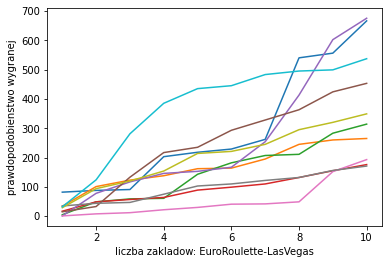

Rezultat:

srednia, 194.86

wariancja, 26065.53575757576

odchylenie standardowe, 161.4482448265566

---------------------------------------------------------------

sredni czas oczekiwania:  31.65833333333333  dni.
srednia: 194.86
wariancja: 26065.53575757576
odchylenie standardowe: 161.4482448265566


In [22]:
length = 10
numberOfGames = 10

game: Game = EuroRoulette("EuroRoulette-LasVegas", True, 0, 36, True, 1)
play(length, numberOfGames, game, "LasVegas")
game.show()

Lotto-MonteCarlo
Monte Carlo
--- 0.15931996901830037 minutes ---


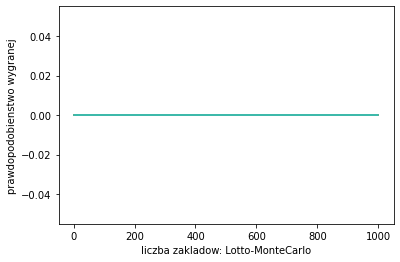

Rezultat:

srednia, 0.0

wariancja, 0.0

odchylenie standardowe, 0.0

---------------------------------------------------------------

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [23]:
length = 1000
numberOfGames = 1000

game = Lotto("Lotto-MonteCarlo", True, 1, 49, False, 6)
play(length, numberOfGames, game, "MonteCarlo")
game.show()

In [ ]:
length = 10
numberOfGames = 5

game = Lotto("Lotto-LasVegas", True, 1, 49, True, 6)
play(length, numberOfGames, game, "LasVegas")
game.show()

Lotto-LasVegas
Las Vegas


In [ ]:
length = 1000
numberOfGames = 1000

game = MultiMulti("MultiMulti-MonteCarlo", True, 1, 80, False, 20, 10)
play(length, numberOfGames, game, "MonteCarlo")
game.show()

In [ ]:
length = 10
numberOfGames = 5

game = MultiMulti("MultiMulti-LasVegas", True, 1, 80, True, 20, 10)
play(length, numberOfGames, game, "LasVegas")
game.show()

In [ ]:
length = 1000
numberOfGames = 1000

game = EuroJackpot("EuroJackpot-MonteCarlo", True, 1, 50, False, 5, 1, 10, 2)
play(length, numberOfGames, game, "MonteCarlo")
game.show()

In [ ]:
length = 10
numberOfGames = 5

game = EuroJackpot("EuroJackpot-LasVegas", True, 1, 50, True, 5, 1, 12, 2)
play(length, numberOfGames, game, "LasVegas")
game.show()

In [ ]:
length = 1000
numberOfGames = 1000

game = PowerBall("PowerBall-MonteCarlo", True, 1, 69, False, 5, 1, 26, 1)
play(length, numberOfGames, game, "MonteCarlo")
game.show()

In [ ]:
length = 10
numberOfGames = 5

game = PowerBall("PowerBall-LasVegas", True, 1, 69, True, 5, 1, 26, 1)
play(length, numberOfGames, game, "LasVegas")
game.show()